<a href="https://colab.research.google.com/github/hewanshrestha/Visual-Computing-Exercises/blob/master/Feature_Extraction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Extraction with Python**

In [ ]:
from torchvision import datasets
import pickle
import PIL
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
# Dataset Loading
train_set = datasets.CIFAR10('./cifar10/', train=True, download=True)
test_set = datasets.CIFAR10('./cifar10/', train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10/
Files already downloaded and verified


In [ ]:
#Size of Train and Test Dataset
print('Size of training dataset: '+str(len(train_set)))
print('Size of testing dataset: '+str(len(test_set)))

Size of training dataset: 50000
Size of testing dataset: 10000


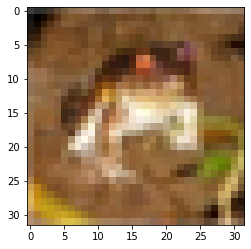

In [ ]:
#Feature Extraction on a Single Image
img = train_set[0][0]
img_gray = img.convert('L')
img_arr = np.array(img_gray)
plt.imshow(img)

**Local Binary Patterns**

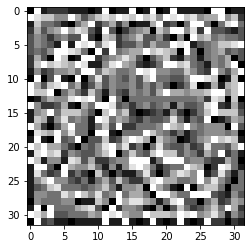

In [ ]:
# Finding LBP(Local Binary Patterns)
feature_lbp = local_binary_pattern(img_arr,8,1,'uniform') # radius=1, no. of neighbours=8
feature_lbp = np.uint8((feature_lbp/feature_lbp.max())*255) # converting lbp matrix into uint8
lbp_img = PIL.Image.fromarray(feature_lbp)
plt.imshow(lbp_img, cmap='gray')

In [ ]:
# Finding energy and entropy of LBP feature
lbp_hist,_ = np.histogram(feature_lbp,8) # input_array=feature_lbp, no. of bins=8
lbp_hist = np.array(lbp_hist, dtype='float')
lbp_prob = np.divide(lbp_hist, np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP Energy: '+str(lbp_energy))
print('LBP Entropy: '+str(lbp_entropy))

LBP Energy: 0.14315032958984375
LBP Entropy: 2.8972505530220363


**Co-occurence Matrix**

In [ ]:
# Finding GLCM features from co-occurence matrix
gCoMat = greycomatrix(img_arr, [2], [0], symmetric=True, normed=True)
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')
print('Contrast: '+str(contrast[0][0]))
print('Dissimilarity: '+str(dissimilarity[0][0]))
print('Homogeneity: '+str(homogeneity[0][0]))
print('Energy: '+str(energy[0][0]))
print('Correlation: '+str(correlation[0][0]))

Contrast: 1296.8916666666667
Dissimilarity: 24.225
Homogeneity: 0.06323755700795276
Energy: 0.027282918445226654
Correlation: 0.6119618429581918


**Gabor Filter**

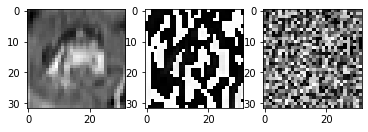

In [ ]:
# Gabor Filter
gaborFilt_real, gaborFilt_imag = gabor(img_arr, frequency=0.7)
gaborFilt = (gaborFilt_real**2 + gaborFilt_imag**2) // 2

# Displaying filter response
fig, ax = plt.subplots(1,3)
ax[0].imshow(gaborFilt_real, cmap='gray')
ax[1].imshow(gaborFilt_imag, cmap='gray')
ax[2].imshow(gaborFilt, cmap='gray')

In [ ]:
# Finding energy and entropy of LBP feature
gabor_hist,_ = np.histogram(gaborFilt,8) # input_array=feature_lbp, no. of bins=8
gabor_hist = np.array(gabor_hist, dtype='float')
gabor_prob = np.divide(gabor_hist, np.sum(gabor_hist))
gabor_energy = np.sum(gabor_prob**2)
gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
print('LBP Energy: '+str(gabor_energy))
print('LBP Entropy: '+str(gabor_entropy))

LBP Energy: 0.15009307861328125
LBP Entropy: 2.8516917329731735


**Extracting features from all images in the dataset**

In [ ]:
# Generating training data by extracting features from all images
label = []
feature_len = 2+5+2
train_feature = np.zeros((len(train_set),feature_len)) # Feature vector of each image is of size 1x1030
for tr in tqdm.tqdm_notebook(range(len(train_set))):

    img = train_set[tr][0] # One image at a time
    img_gray = img.convert('L') # Converting to grayscale
    img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0]) # Converting to array

    # LBP
    feature_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
    lbp_hist,_ = np.histogram(feature_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))   

    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')    
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')    
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])

    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))

    # Concatenating features(2+5+2)    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)
    train_feature[tr,:] = concat_feat #Stacking features vectors for each image

    # Class label
    label.append(train_set[tr][1])

train_label = np.array(label) #Conversion from list to array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/50000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


In [51]:
# Generating testing data by extracting features from all images
label = []
test_feature = np.zeros((len(test_set),feature_len)) # Feature vector of each image is of size 1x1030
for ts in tqdm.tqdm_notebook(range(len(test_set))):
    
    img = test_set[ts][0] #One image at a time
    img_gray = img.convert('L') #Converting to grayscale
    img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0]) #Converting to array

    # LBP
    feature_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
    lbp_hist,_ = np.histogram(feature_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))

    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast')
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
    homogeneity = greycoprops(gCoMat, prop='homogeneity')    
    energy = greycoprops(gCoMat, prop='energy')
    correlation = greycoprops(gCoMat, prop='correlation')    
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])

    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))

    # Concatenating features(2+5+2)    
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)    
    test_feature[ts,:] = concat_feat  #Stacking features vectors for each image

    # Class label
    label.append(test_set[ts][1])

test_label = np.array(label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


**Feature normalization**

In [54]:
# Normalizing the train features to the range [0,1]
trMaxs = np.amax(train_feature,axis=0) #Finding maximum along each column
trMins = np.amin(train_feature,axis=0) #Finding maximum along each column
trMaxs_rep = np.tile(trMaxs,(50000,1)) #Repeating the maximum value along the rows
trMins_rep = np.tile(trMins,(50000,1)) #Repeating the minimum value along the rows
trainFeatsNorm = np.divide(train_feature-trMins_rep,trMaxs_rep) #Element-wise division

# Normalizing the test features
tsMaxs_rep = np.tile(trMaxs,(10000,1)) #Repeating the maximum value along the rows
tsMins_rep = np.tile(trMins,(10000,1)) #Repeating the maximum value along the rows
testFeatsNorm = np.divide(test_feature-tsMins_rep,tsMaxs_rep) #Element-wise division

**Saving feature matrices to disk**

In [55]:
# Saving normalized training data and labels
with open("train_feature.pckl", "wb") as f:
    pickle.dump(trainFeatsNorm, f)
with open("train_label.pckl", "wb") as f:
    pickle.dump(train_label, f)
    
# Saving normalized testing data and labels
with open("test_feature.pckl", "wb") as f:
    pickle.dump(testFeatsNorm, f)
with open("test_label.pckl", "wb") as f:
    pickle.dump(test_label, f)
    
print('Files saved to disk!')

Files saved to disk!
Files saved to disk!
